In [1]:
import os

# Anzeigen des aktuellen Arbeitsverzeichnisses
current_working_directory = os.getcwd()
print("Aktuelles Arbeitsverzeichnis:", current_working_directory)


Aktuelles Arbeitsverzeichnis: /Users/henrikfliegel/Desktop/Uni/SoSe24/MlClaas/ML-with-CLAAS


In [2]:
import pandas as pd

df = pd.read_excel('CLAAS_data/Option Take Rate_2023.XLSX')
df


,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B00,10,5,5,100,Generation 0
1,20011530,113,2023,CRU,MD_B06,60,5,5,100,Standard Antr.
2,20011530,113,2023,CRU,MD_B08,40,5,5,100,SW-Zylinder 2-Wege System
3,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
4,20011530,113,2023,CRU,MD_B11,20,5,5,100,Kupplung normal
...,...,...,...,...,...,...,...,...,...,...
26194,20011550,846,2023,CCN,MD_T03,20,6,6,100,Maschine fahrbereit
26195,20011550,846,2023,CCN,MD_T03,190,6,6,100,Konservierung (?ersee)
26196,20011550,846,2023,CCN,MD_T03,410,6,6,100,ALR-Beleuchtung 2
26197,20011550,846,2023,CCN,MD_Z02,1147,6,6,100,822/122_CERIO 680


In [30]:
# Definiere die Liste der gewünschten Merkmale
gewünschte_merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Filtere den DataFrame, um nur Zeilen mit den gewünschten Merkmalen zu behalten
filtered_df = df[df['Merkmal'].isin(gewünschte_merkmale)]

filtered_df = filtered_df.reset_index(drop=True)


# Überprüfe das Ergebnis
filtered_df

,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
1,20011530,113,2023,CRU,MD_G02,402,5,5,100,SC + STV Sm
2,20011530,113,2023,CRU,MD_N02,394,5,5,100,S1 10L
3,20011530,113,2023,CRU,MD_N08,803,5,5,100,LA S FIX 6L
4,20011530,113,2023,CRU,MD_P02,2006,5,5,100,QSB67 K R120-190 T3
...,...,...,...,...,...,...,...,...,...,...
1794,20011550,846,2023,CCN,MD_G02,405,6,6,100,SC HD U + STV Sm 1X6
1795,20011550,846,2023,CCN,MD_N02,622,6,6,100,M1 TT W EHS
1796,20011550,846,2023,CCN,MD_N05,114,6,6,100,TT 890 breit
1797,20011550,846,2023,CCN,MD_N08,920,6,6,100,LTA M VAR 8L


In [28]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die DataFrames für jedes Merkmal zu speichern
dfs = {}

total_count_m = 0 
total_count_m2 = 0

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df[df['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)
    
    # Speichere den DataFrame im Wörterbuch unter dem Schlüssel des Merkmals
    dfs[merkmal] = filtered_df

    # Zähle die Anzahl der Einträge mit einem %-Anteil unter 100
    count_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    total_count_mm = filtered_df.shape[0]  # Gesamtanzahl der Einträge für das Merkmal
    print(f'{merkmal}: {count_under_100} entries with %-Anteil under 100%, out of {total_count_mm} total entries')

    total_count_m += count_under_100 
    total_count_m2 += total_count_mm


print(f'Total: {total_count_m} entries with %-Anteil under 100%, out of {total_count_m2} total entries')

# Jetzt kannst du auf jeden DataFrame über das Wörterbuch zugreifen, z.B.:
dfs['MD_N02'] # Zeigt den DataFrame für das Merkmal 'P02'

MD_P02: 108 entries with %-Anteil under 100%, out of 281 total entries
MD_N02: 222 entries with %-Anteil under 100%, out of 365 total entries
MD_N08: 171 entries with %-Anteil under 100%, out of 321 total entries
MD_N05: 18 entries with %-Anteil under 100%, out of 56 total entries
MD_B10: 210 entries with %-Anteil under 100%, out of 356 total entries
MD_G02: 299 entries with %-Anteil under 100%, out of 420 total entries
Total: 1028 entries with %-Anteil under 100%, out of 1799 total entries


,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_N02,394,5,5,100,S1 10L
1,20011530,113,2023,TW,MD_N02,394,1,1,100,S1 10L
2,20011530,113,2023,UZ,MD_N02,394,1,1,100,S1 10L
3,20011530,113,2023,XS,MD_N02,394,3,3,100,S1 10L
4,20011530,115,2023,AT,MD_N02,394,2,3,67,S1 10L
...,...,...,...,...,...,...,...,...,...,...
360,20011550,845,2023,IT,MD_N02,621,7,7,100,M1 TT EHS
361,20011550,845,2023,LV,MD_N02,621,1,1,100,M1 TT EHS
362,20011550,845,2023,RO,MD_N02,621,1,1,100,M1 TT EHS
363,20011550,845,2023,SE,MD_N02,621,1,1,100,M1 TT EHS


In [52]:
import pandas as pd

# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions = {}
percentage_distributions_count = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df[df['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

# Now, 'percentage_distributions' dictionary contains the data needed for plotting
percentage_distributions

MD_P02: 108 entries with %-Anteil under 100%, out of 281 total entries
MD_N02: 222 entries with %-Anteil under 100%, out of 365 total entries
MD_N08: 171 entries with %-Anteil under 100%, out of 321 total entries
MD_N05: 18 entries with %-Anteil under 100%, out of 56 total entries
MD_B10: 210 entries with %-Anteil under 100%, out of 356 total entries
MD_G02: 299 entries with %-Anteil under 100%, out of 420 total entries


{'MD_P02': {2040: [86, 75, 74, 50, 50, 50],
  2041: [14, 25, 26, 50, 50, 50],
  2045: [60, 97, 67, 38, 17, 40, 67, 44, 92, 79, 91, 80, 81, 25],
  2046: [40, 3, 33, 62, 83, 60, 33, 56, 8, 21, 9, 20, 19, 75],
  2055: [87, 87, 80, 80, 11, 50, 60, 67, 40, 73],
  2056: [13, 13, 20, 20, 89, 50, 40, 33, 60, 27],
  2060: [50, 82, 80],
  2061: [50, 18, 20],
  2070: [61, 38, 96, 45, 6, 50, 89, 83, 97, 87, 67, 20, 93],
  2071: [39, 62, 4, 55, 94, 50, 11, 17, 3, 13, 33, 80, 7],
  2075: [50, 87, 50, 75, 57, 89, 56, 14],
  2076: [50, 13, 50, 25, 43, 11, 44, 86]},
 'MD_N02': {394: [67, 75, 71, 92, 87, 83],
  395: [25, 10, 8, 9, 17],
  396: [33, 4],
  397: [19],
  398: [47,
   33,
   38,
   83,
   67,
   12,
   62,
   17,
   20,
   56,
   20,
   50,
   75,
   50,
   23,
   62,
   10,
   40,
   40,
   49,
   44,
   8,
   27,
   50],
  399: [50, 33, 11, 33, 44, 40, 17, 33, 10],
  400: [37, 10, 33, 38, 50, 12, 80, 5, 33, 27],
  401: [3, 3, 50],
  402: [11,
   12,
   22,
   50,
   25,
   73,
   57,
   67,

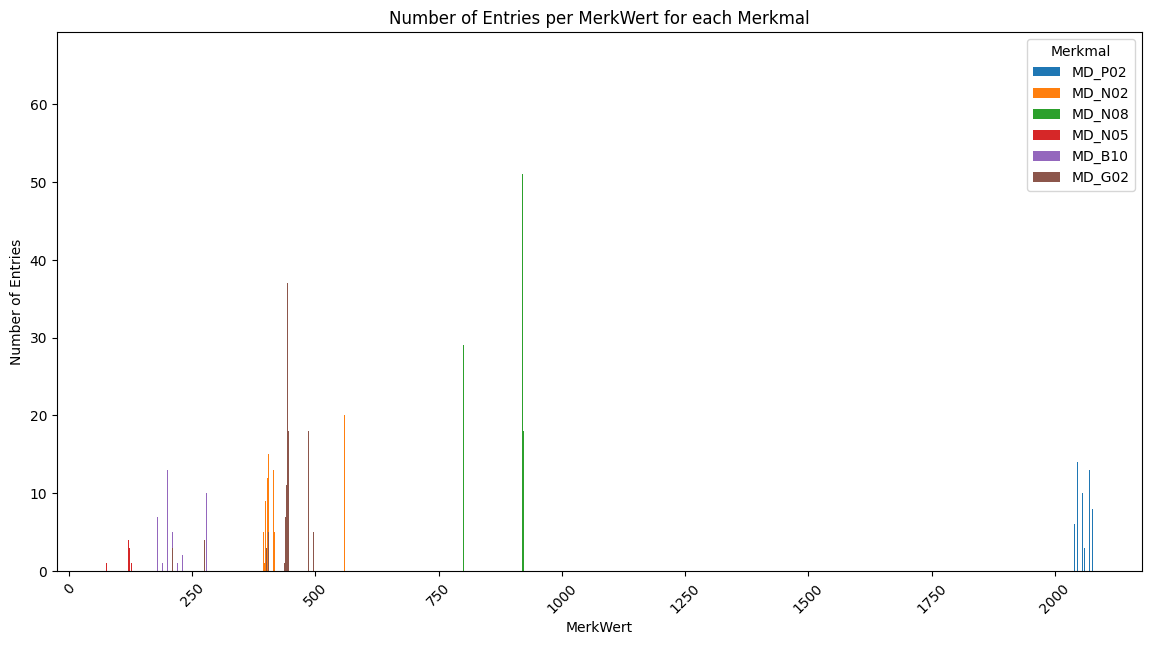

In [43]:
import matplotlib.pyplot as plt

# Assuming percentage_distributions is populated with the relevant data
# as described in your previous snippet.

# Plotting the number of entries for each MerkWert per Merkmal
fig, ax = plt.subplots(figsize=(14, 7))

# Iterating through each Merkmal
for merkmal, distributions in percentage_distributions.items():
    merkwerte = distributions.keys()
    counts = [len(values) for values in distributions.values()]

    # Create a bar plot for each MerkWert for the current Merkmal
    ax.bar(merkwerte, counts, label=merkmal)

ax.set_xlabel('MerkWert')
ax.set_ylabel('Number of Entries')
ax.set_title('Number of Entries per MerkWert for each Merkmal')
ax.legend(title="Merkmal")

plt.xticks(rotation=45)
plt.show()


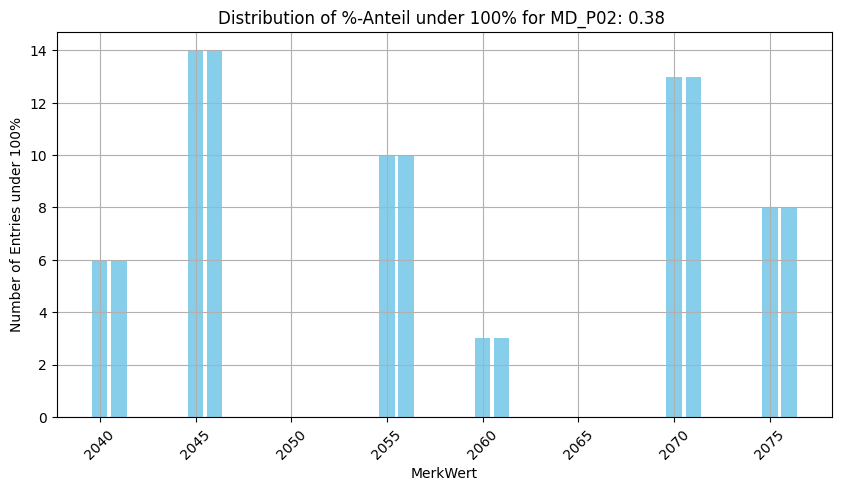

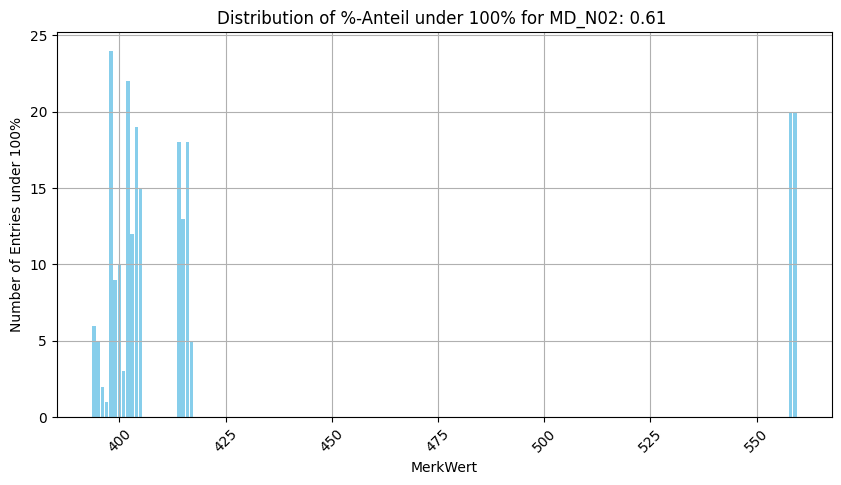

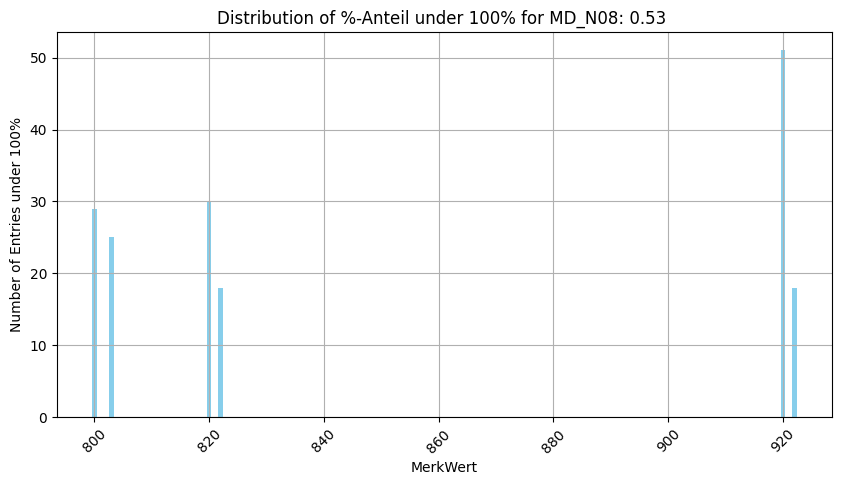

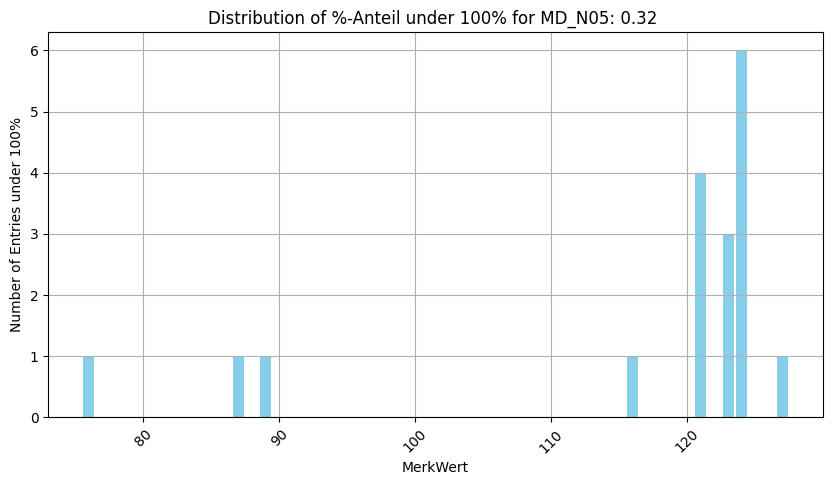

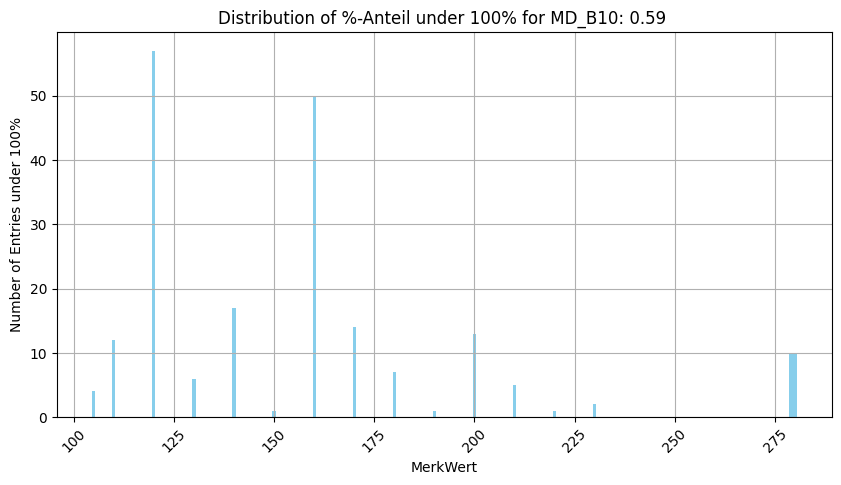

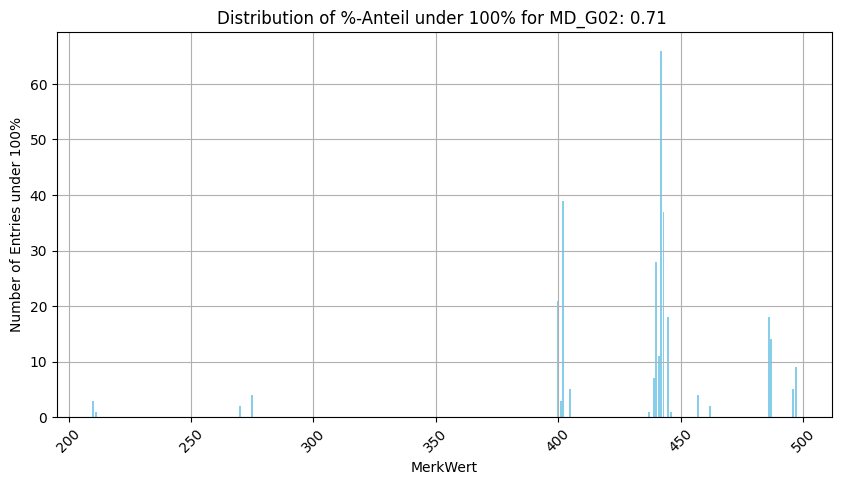

In [50]:
import matplotlib.pyplot as plt

# Assuming percentage_distributions contains your data as previously defined
for merkmal, distributions in percentage_distributions.items():
    merkwerte = list(distributions.keys())
    counts = [len(values) for values in distributions.values()]

    plt.figure(figsize=(10, 5))  # Set the figure size as per your requirement
    plt.bar(merkwerte, counts, color='skyblue')
    plt.xlabel('MerkWert')
    plt.ylabel('Number of Entries under 100%')
    plt.title(f'Distribution of %-Anteil under 100% for {merkmal}: {percentage_distributions_count[merkmal]} ')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.grid(True)
    plt.show()


In [41]:

df2 = dfs['MD_B10']
# Finde alle einzigartigen Werte in der Spalte 'MerkWert'
unique_merkwerte = df2['MerkWert'].unique()

# Erstelle ein Wörterbuch, um die DataFrames zu speichern
dfs = {}

# Erstelle für jeden einzigartigen Wert in 'MerkWert' einen eigenen DataFrame
for wert in unique_merkwerte:
    dfs[wert] = df2[df2['MerkWert'] == wert].reset_index(drop=True)

# Nun kannst du auf jeden DataFrame über das Wörterbuch zugreifen, z.B.:
# Um den DataFrame für den MerkWert 2006 zu sehen
#dfs[394]

KeyError: 'MD_B10'

In [37]:
dfs['MD_P02']


,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_P02,2006,5,5,100,QSB67 K R120-190 T3
1,20011530,113,2023,TW,MD_P02,2006,1,1,100,QSB67 K R120-190 T3
2,20011530,113,2023,UZ,MD_P02,2006,1,1,100,QSB67 K R120-190 T3
3,20011530,113,2023,XS,MD_P02,2006,3,3,100,QSB67 K R120-190 T3
4,20011530,115,2023,AT,MD_P02,2040,3,3,100,B6.7 R120-190 E5/T4
...,...,...,...,...,...,...,...,...,...,...
276,20011550,845,2023,IT,MD_P02,2076,6,7,86,L9 K R120-320 E5/T4
277,20011550,845,2023,LV,MD_P02,2076,1,1,100,L9 K R120-320 E5/T4
278,20011550,845,2023,RO,MD_P02,2076,1,1,100,L9 K R120-320 E5/T4
279,20011550,845,2023,SE,MD_P02,2075,1,1,100,L9 R120-320 E5/T4


In [42]:
print(unique_merkwerte)

[170 105 110 160 120 200 130 140 180 161 280 279 150 210 230 190 220]


In [43]:
len(unique_merkwerte)

17

In [49]:
#Gibt die Summe der MerkWerte pro Merkmal sowie die gesamte Anzahl an MerkWerten aus
sum = 0
for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df[df['Merkmal'] == merkmal]
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)
    unique_merkwerte = filtered_df['MerkWert'].unique()
    sum += len(unique_merkwerte)
    print(merkmal, len(unique_merkwerte))
    
print(sum)




 

MD_P02 25
MD_N02 22
MD_N08 7
MD_N05 11
MD_B10 17
MD_G02 24
106


# Take Rate Analysis 2021-2023

### Einlesen der Ausgangsdaten und Überprüfung der Datenstruktur (Zeilen, Spalten)

In [58]:
df_23 = pd.read_excel('CLAAS_data/Option Take Rate_2023.XLSX')
df_22 = pd.read_excel('CLAAS_data/Option Take Rate_2022.XLSX')
df_21 = pd.read_excel('CLAAS_data/Option Take Rate_2021.XLSX')

print(df_23.shape)
print(df_22.shape)
print(df_21.shape)

(26199, 10)
(39365, 10)
(35618, 10)


### Reduktion der Daten auf ausgewählte Merkmale. Ausgabe Anzahl interessanter Instanzen pro Jahr.

In [60]:
# Definiere die Liste der gewünschten Merkmale
gewünschte_merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Filtere den DataFrame, um nur Zeilen mit den gewünschten Merkmalen zu behalten
filtered_df_23 = df_23[df_23['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_23 = filtered_df_23.reset_index(drop=True)

filtered_df_22 = df_22[df_22['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_22 = filtered_df_22.reset_index(drop=True)

filtered_df_21 = df_21[df_21['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_21 = filtered_df_21.reset_index(drop=True)

# Überprüfe das Ergebnis
print(filtered_df_23.shape)
print(filtered_df_22.shape)
print(filtered_df_21.shape)

(1799, 10)
(2832, 10)
(2862, 10)


### Instanzen pro Jahr deren Merkmalskonfiguration nicht 100% in dem Jahr entspricht.

In [77]:
print(filtered_df_23[filtered_df_23['%-Anteil'] < 100].shape)
print(filtered_df_22[filtered_df_22['%-Anteil'] < 100].shape)
print(filtered_df_21[filtered_df_21['%-Anteil'] < 100].shape)

(1028, 10)
(1408, 10)
(1743, 10)


In [78]:
filtered_df_23.head(50)

,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
1,20011530,113,2023,CRU,MD_G02,402,5,5,100,SC + STV Sm
2,20011530,113,2023,CRU,MD_N02,394,5,5,100,S1 10L
3,20011530,113,2023,CRU,MD_N08,803,5,5,100,LA S FIX 6L
4,20011530,113,2023,CRU,MD_P02,2006,5,5,100,QSB67 K R120-190 T3
5,20011530,113,2023,TW,MD_B10,105,1,1,100,Std-K ECO Cont offen Kett
6,20011530,113,2023,TW,MD_G02,400,1,1,100,C + STV Sm
7,20011530,113,2023,TW,MD_N02,394,1,1,100,S1 10L
8,20011530,113,2023,TW,MD_N08,920,1,1,100,LTA M VAR 8L
9,20011530,113,2023,TW,MD_P02,2006,1,1,100,QSB67 K R120-190 T3


### Analyse von der Anazhl Instanzen pro Merkmal deren Konfiguration nicht 100% entspricht

In [61]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions_23 = {}
percentage_distributions_count_23 = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df_23[df_23['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions_23[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count_23[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

MD_P02: 108 entries with %-Anteil under 100%, out of 281 total entries
MD_N02: 222 entries with %-Anteil under 100%, out of 365 total entries
MD_N08: 171 entries with %-Anteil under 100%, out of 321 total entries
MD_N05: 18 entries with %-Anteil under 100%, out of 56 total entries
MD_B10: 210 entries with %-Anteil under 100%, out of 356 total entries
MD_G02: 299 entries with %-Anteil under 100%, out of 420 total entries


In [62]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions_22 = {}
percentage_distributions_count_22 = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df_22[df_22['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions_22[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count_22[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

MD_P02: 134 entries with %-Anteil under 100%, out of 410 total entries
MD_N02: 159 entries with %-Anteil under 100%, out of 431 total entries
MD_N08: 298 entries with %-Anteil under 100%, out of 518 total entries
MD_N05: 175 entries with %-Anteil under 100%, out of 391 total entries
MD_B10: 384 entries with %-Anteil under 100%, out of 591 total entries
MD_G02: 258 entries with %-Anteil under 100%, out of 491 total entries


In [63]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions_21 = {}
percentage_distributions_count_21 = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df_21[df_21['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions_21[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count_21[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

MD_P02: 194 entries with %-Anteil under 100%, out of 415 total entries
MD_N02: 160 entries with %-Anteil under 100%, out of 405 total entries
MD_N08: 341 entries with %-Anteil under 100%, out of 515 total entries
MD_N05: 183 entries with %-Anteil under 100%, out of 326 total entries
MD_B10: 526 entries with %-Anteil under 100%, out of 681 total entries
MD_G02: 339 entries with %-Anteil under 100%, out of 520 total entries


### Ausgabe des Anteils Instanzen mit unter 100% Konfiguration pro Merkmal pro Jahr

In [76]:
# Combine into a DataFrame
df = pd.DataFrame({
    '2021': percentage_distributions_count_21,
    '2022': percentage_distributions_count_22,
    '2023': percentage_distributions_count_23
})

# Show the DataFrame
df

,2021,2022,2023
MD_P02,0.47,0.33,0.38
MD_N02,0.40,0.37,0.61
MD_N08,0.66,0.58,0.53
MD_N05,0.56,0.45,0.32
MD_B10,0.77,0.65,0.59
MD_G02,0.65,0.53,0.71


### Analyse über alle 3 Jahre

In [80]:
result = pd.concat([filtered_df_23, filtered_df_22, filtered_df_21], ignore_index=True)
result.shape

(7493, 10)

In [107]:
result_crop = result.drop(['Material', 'Jahr', 'S-Merkmal', 'S-Maschine', 'Bezeich.Merkmalwert'], axis=1)
result_crop

,UTyp,PLand,Merkmal,MerkWert,%-Anteil
0,113,CRU,MD_B10,170,100
1,113,CRU,MD_G02,402,100
2,113,CRU,MD_N02,394,100
3,113,CRU,MD_N08,803,100
4,113,CRU,MD_P02,2006,100
...,...,...,...,...,...
7482,933,UA,MD_N02,628,100
7484,933,UA,MD_N05,124,100
7485,933,UA,MD_N08,964,100
7487,935,GB,MD_B10,220,100


### Anzahl Kombinationen aus UTyp, PLand, Merkmal und MerkWert

In [109]:
result_crop_2 = result_crop.drop(['%-Anteil'], axis=1)
result_crop_2.drop_duplicates()

,UTyp,PLand,Merkmal,MerkWert
0,113,CRU,MD_B10,170
1,113,CRU,MD_G02,402
2,113,CRU,MD_N02,394
3,113,CRU,MD_N08,803
4,113,CRU,MD_P02,2006
...,...,...,...,...
7479,865,SK,MD_P02,969
7480,933,UA,MD_B10,210
7482,933,UA,MD_N02,628
7484,933,UA,MD_N05,124


In [87]:
grouped = result_crop.groupby(['UTyp', 'PLand', 'Merkmal', 'MerkWert', '%-Anteil']).size()

In [88]:
grouped

UTyp  PLand  Merkmal  MerkWert  %-Anteil
113   CRU    MD_B10   170       100         1
             MD_G02   402       100         1
             MD_N02   394       100         1
             MD_N08   803       100         1
             MD_P02   2006      100         1
                                           ..
965   RO     MD_N05   42        100         1
                      121       50          1
                      124       50          1
             MD_N08   864       100         1
             MD_P02   969       100         1
Length: 6494, dtype: int64

### Anzahl Kombinatiionen die über 3 Jahre immer die gleichen %-Anteil haben

In [94]:
consistent_groups = grouped[grouped == 3]
print(consistent_groups)


UTyp  PLand  Merkmal  MerkWert  %-Anteil
115   BG     MD_B10   120       100         3
      CPL    MD_B10   120       100         3
             MD_N02   450       100         3
      DE     MD_N02   450       100         3
      FR     MD_N02   450       100         3
                                           ..
925   DE     MD_N02   628       100         3
             MD_N05   5         100         3
945   DE     MD_G02   487       100         3
             MD_N02   628       100         3
             MD_N05   5         100         3
Length: 83, dtype: int64


In [97]:
consistent_df = consistent_groups.reset_index(name='Count')

# Filtern der Einträge, bei denen der %-Anteil unter 100 liegt
filtered_consistent = consistent_df[consistent_df['%-Anteil'] < 100]

print(filtered_consistent)

    UTyp PLand Merkmal  MerkWert  %-Anteil  Count
18   125   CPL  MD_N08       920        13      3
21   125    FR  MD_B10       140         3      3
36   145    DK  MD_B10       200        25      3
38   145    ES  MD_N02       703        67      3


In [98]:
consistent_groups.reset_index(name='Count')

,UTyp,PLand,Merkmal,MerkWert,%-Anteil,Count
0,115,BG,MD_B10,120,100,3
1,115,CPL,MD_B10,120,100,3
2,115,CPL,MD_N02,450,100,3
3,115,DE,MD_N02,450,100,3
4,115,FR,MD_N02,450,100,3
...,...,...,...,...,...,...
78,925,DE,MD_N02,628,100,3
79,925,DE,MD_N05,5,100,3
80,945,DE,MD_G02,487,100,3
81,945,DE,MD_N02,628,100,3


# Neue Daten

In [2]:
import pandas as pd

df = pd.read_excel('CLAAS_data/S612_P10_CSE_20240529.XLSX')


In [48]:
df

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
0,0,2013-10-14,10,20002640,C64,C6414031,15624,2,MD_B04,20,MD_B04_Schneidwerks-Führung,0020_Auto-Cont:SW-Reg.Seitenau,15
1,0,2013-10-14,10,20002640,C64,C6414031,15625,1,MD_B05,10,MD_B05_Zubehör Vorsatz,0010_Beleucht.klappb.Vorsätze,3
2,0,2013-10-14,10,20002640,C64,C6414031,15625,3,MD_B05,201,MD_B05_Zubehör Vorsatz,0201_Autopilot fuer ULA,3
3,0,2013-10-14,10,20002640,C64,C6414031,15625,6,MD_B05,130,MD_B05_Zubehör Vorsatz,0130_Laserpilotsensor li,3
4,0,2013-10-14,10,20002640,C64,C6414031,15626,1,MD_B06,10,MD_B06_Schneidwerksantrieb,0010_SW-Antrieb Standard,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458028,0,2024-09-10,10,20002840,C84,C8424511,29951,2,MD_B00,20,MD_B00_Architektur,0020_Generation 1,1
458029,0,2024-09-10,10,20002840,C84,C8424511,30252,9,MD_N14,130,MD_N14_Plattform,0130_Plattform TT L1,1
458030,0,2024-09-10,10,20002840,C84,C8424511,30495,13,MD_F12,140,MD_F12_Auslaufrohrtülle,0140_Tülle schwenkbar 330 XL,1
458031,0,2024-09-10,10,20002840,C84,C8424511,30557,2,MD_Q34,10,MD_Q34_Module,0010_CHS 1,1


In [49]:
df["Merkmalname"].drop_duplicates().reset_index(drop=True)

0     MD_B04
1     MD_B05
2     MD_B06
3     MD_B08
4     MD_B10
       ...  
90    MD_N14
91    MD_Q41
92    MD_S10
93    MD_Z05
94    MD_Q36
Name: Merkmalname, Length: 95, dtype: object

In [50]:
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

filtered_df = df[df['Merkmalname'].isin(merkmale)]
filtered_df

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
6,0,2013-10-14,10,20002640,C64,C6414031,15628,3,MD_B10,35,MD_B10_Einzugskanal,0035_E-Kanal Contour,15
32,0,2013-10-14,10,20002640,C64,C6414031,15643,1,MD_G02,210,MD_G02_Strohablage,0210_Strohleitschurz,3
33,0,2013-10-14,10,20002640,C64,C6414031,15643,4,MD_G02,225,MD_G02_Strohablage,0225_Strohh SC,4
34,0,2013-10-14,10,20002640,C64,C6414031,15643,6,MD_G02,235,MD_G02_Strohablage,0235_Strohh SC/SV,8
35,0,2013-10-14,10,20002640,C64,C6414031,15644,1,MD_N02,382,MD_N02_Fahrantrieb,0382_TA EFA M. 10L,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457960,0,2024-09-10,10,20002840,C84,C8424511,26346,3,MD_N02,628,MD_N02_Fahrantrieb,0628_TA EFA XL TERRA TRAC,1
457962,0,2024-09-10,10,20002840,C84,C8424511,26348,11,MD_N05,5,MD_N05_Zubehör Triebachsbereif,0005_Bergeösen,1
457963,0,2024-09-10,10,20002840,C84,C8424511,26348,12,MD_N05,421,MD_N05_Zubehör Triebachsbereif,0421_TT 635 HL,1
457965,0,2024-09-10,10,20002840,C84,C8424511,26350,9,MD_N08,820,MD_N08_Lenkachse,0820_LA M VAR 8L,1


In [52]:
filtered_df.tail(50)

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
457235,0,2024-09-02,10,20002860,C86,C8624501,26470,14,MD_N08,864,MD_N08_Lenkachse,0864_LA XL VAR 10L ZSA,0
457236,0,2024-09-02,10,20002860,C86,C8624501,26470,22,MD_N08,964,MD_N08_Lenkachse,0964_LTA XL VAR 10L ZSA,1
457244,0,2024-09-02,10,20002860,C86,C8624501,26473,12,MD_P02,936,MD_P02_Motorausführungen,0936_D2676 K R120-404 E5,0
457245,0,2024-09-02,10,20002860,C86,C8624501,26473,14,MD_P02,955,MD_P02_Motorausführungen,0955_OM473 K R120-460 E5,0
457246,0,2024-09-02,10,20002860,C86,C8624501,26473,16,MD_P02,967,MD_P02_Motorausführungen,0967_D4276 K R120-515 E5,0
457247,0,2024-09-02,10,20002860,C86,C8624501,26473,17,MD_P02,963,MD_P02_Motorausführungen,0963_D4276 K R120-515 T3,1
457389,0,2024-09-09,10,20002850,C85,C8524511,26386,9,MD_B10,200,MD_B10_Einzugskanal,0200_HP-Kanal offen Kette,0
457406,0,2024-09-09,10,20002850,C85,C8524511,26403,15,MD_G02,487,MD_G02_Strohablage,0487_SC HD + RV Sk + SV,0
457408,0,2024-09-09,10,20002850,C85,C8524511,26406,11,MD_N02,708,MD_N02_Fahrantrieb,0708_EFA XL 20L DIFF.-SPER,0
457410,0,2024-09-09,10,20002850,C85,C8524511,26408,13,MD_N05,40,MD_N05_Zubehör Triebachsbereif,0040_Achsschutz,0


In [22]:
# Konvertieren des Datumsstrings in ein datetime-Objekt, falls notwendig
filtered_df['Datum'] = pd.to_datetime(filtered_df['Datum'], format='%Y-%m-%d')

# Filtern des DataFrames, um nur Daten vor oder am 31. Mai 2024 zu erhalten
filtered_df2 = filtered_df[filtered_df['Datum'] <= pd.Timestamp('2024-05-31')]


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/3342785104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Datum'] = pd.to_datetime(filtered_df['Datum'], format='%Y-%m-%d')


In [24]:
filtered_df_crop = filtered_df.drop(['Seriennummer', 'Werk', 'Material', 'Version'], axis=1)
filtered_df_crop

,Datum,Objekttyp,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
6,2013-10-14,C64,15628,3,MD_B10,35,MD_B10_Einzugskanal,0035_E-Kanal Contour,15
32,2013-10-14,C64,15643,1,MD_G02,210,MD_G02_Strohablage,0210_Strohleitschurz,3
33,2013-10-14,C64,15643,4,MD_G02,225,MD_G02_Strohablage,0225_Strohh SC,4
34,2013-10-14,C64,15643,6,MD_G02,235,MD_G02_Strohablage,0235_Strohh SC/SV,8
35,2013-10-14,C64,15644,1,MD_N02,382,MD_N02_Fahrantrieb,0382_TA EFA M. 10L,10
...,...,...,...,...,...,...,...,...,...
457960,2024-09-10,C84,26346,3,MD_N02,628,MD_N02_Fahrantrieb,0628_TA EFA XL TERRA TRAC,1
457962,2024-09-10,C84,26348,11,MD_N05,5,MD_N05_Zubehör Triebachsbereif,0005_Bergeösen,1
457963,2024-09-10,C84,26348,12,MD_N05,421,MD_N05_Zubehör Triebachsbereif,0421_TT 635 HL,1
457965,2024-09-10,C84,26350,9,MD_N08,820,MD_N08_Lenkachse,0820_LA M VAR 8L,1


In [26]:
# Gruppieren nach 'Merkmalname' und 'Merkmalwert' und Summieren der 'Bestätigte Menge'
grouped_df = filtered_df.groupby(['Merkmalname', 'Merkmalwert'])['Bestätigte Menge'].sum().reset_index()

# Umbenennen der Spalte für eine klarere Darstellung
grouped_df.rename(columns={'Bestätigte Menge': 'Gesamte Bestätigte Menge'}, inplace=True)

# Ausgabe des resultierenden DataFrames
print(grouped_df)


    Merkmalname  Merkmalwert  Gesamte Bestätigte Menge
0        MD_B10           30                      2338
1        MD_B10           33                        91
2        MD_B10           35                      4307
3        MD_B10           36                      7995
4        MD_B10           37                         0
..          ...          ...                       ...
377      MD_P02         2071                       329
378      MD_P02         2073                        24
379      MD_P02         2075                       316
380      MD_P02         2076                       205
381      MD_P02         2078                        27

[382 rows x 3 columns]


In [27]:
# Berechnen der Anzahl der Merkmalwerte für jeden Merkmalnamen
merkmal_counts = filtered_df.groupby('Merkmalname')['Merkmalwert'].nunique()
print(merkmal_counts)


Merkmalname
MD_B10     34
MD_G02     53
MD_N02     66
MD_N05     38
MD_N08     53
MD_P02    138
Name: Merkmalwert, dtype: int64


In [30]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = filtered_df.groupby(['Merkmalname', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    # Speichern des aggregierten DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data.reset_index()

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmalname: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum'

Merkmalname: MD_B10, Merkmalwert: 30
        Datum  Bestätigte Menge
0  2013-10-31                 1
1  2013-11-30                 0
2  2013-12-31                 7
3  2014-01-31                 0
4  2014-02-28                 0
5  2014-03-31                 0
6  2014-04-30                48
7  2014-05-31                42
8  2014-06-30                19
9  2014-07-31                 0
10 2014-08-31                 0
11 2014-09-30                 0
12 2014-10-31                 0
13 2014-11-30                 0
14 2014-12-31                17
15 2015-01-31                 0
16 2015-02-28                74
17 2015-03-31               173
18 2015-04-30               156
19 2015-05-31               127
20 2015-06-30               205
21 2015-07-31                62
22 2015-08-31                71
23 2015-09-30                 0
24 2015-10-31                75
25 2015-11-30               192
26 2015-12-31                64
27 2016-01-31               117
28 2016-02-29               197
29 

In [31]:
# Filtern des DataFrames für das Jahr 2024
df_2024 = filtered_df[filtered_df['Datum'].dt.year == 2024]

# Berechnen der Anzahl der Merkmalwerte für jeden Merkmalnamen
merkmal_counts = df_2024.groupby('Merkmalname')['Merkmalwert'].nunique()
print(merkmal_counts)


Merkmalname
MD_B10    16
MD_G02    30
MD_N02    31
MD_N05    19
MD_N08    20
MD_P02    54
Name: Merkmalwert, dtype: int64


In [46]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = df_2024.groupby(['Merkmalname', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    # Speichern des aggregierten DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data.reset_index()

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmalname: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen

Merkmalname: MD_B10, Merkmalwert: 105
       Datum  Bestätigte Menge
0 2024-01-31                 1
1 2024-02-29                 5
2 2024-03-31                 0
3 2024-04-30                 3

Merkmalname: MD_B10, Merkmalwert: 110
       Datum  Bestätigte Menge
0 2024-01-31                 8
1 2024-02-29                 4
2 2024-03-31                 5
3 2024-04-30                 4
4 2024-05-31                 1
5 2024-06-30                 3
6 2024-07-31                 8
7 2024-08-31                 0

Merkmalname: MD_B10, Merkmalwert: 120
       Datum  Bestätigte Menge
0 2024-01-31                67
1 2024-02-29                49
2 2024-03-31                45
3 2024-04-30                80
4 2024-05-31                44
5 2024-06-30                54
6 2024-07-31                15
7 2024-08-31                 0
8 2024-09-30                 0

Merkmalname: MD_B10, Merkmalwert: 130
       Datum  Bestätigte Menge
0 2024-01-31                 8
1 2024-02-29                 5
2 2024-0

/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_34807/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum'

In [38]:
print(df_2024)

        Version      Datum  Werk  Material Objekttyp Seriennummer  \
415079        0 2024-01-04    10  20002830       C83     C8324151   
415080        0 2024-01-04    10  20002830       C83     C8324151   
415099        0 2024-01-04    10  20002830       C83     C8324151   
415100        0 2024-01-04    10  20002830       C83     C8324151   
415104        0 2024-01-04    10  20002830       C83     C8324151   
...         ...        ...   ...       ...       ...          ...   
457960        0 2024-09-10    10  20002840       C84     C8424511   
457962        0 2024-09-10    10  20002840       C84     C8424511   
457963        0 2024-09-10    10  20002840       C84     C8424511   
457965        0 2024-09-10    10  20002840       C84     C8424511   
457968        0 2024-09-10    10  20002840       C84     C8424511   

        Merkmalskombination  Kombinationsschlüssel Merkmalname  Merkmalwert  \
415079                26266                      5      MD_B10          160   
415080       

In [39]:
# Speichere den DataFrame in eine Excel-Datei mit spezifischen Optionen
df_2024.to_excel('mein_dataframe.xlsx', sheet_name='MeineDaten', index=False, engine='openpyxl', startrow=1, startcol=1)



In [43]:
df_2024_s = df_2024[df_2024["Seriennummer"] == "C8424151"]
df_2024_s

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
415166,0,2024-01-04,10,20002840,C84,C8424151,26326,5,MD_B10,160,MD_B10_Einzugskanal,0160_V-Kanal CAC offen Kette,1
415167,0,2024-01-04,10,20002840,C84,C8424151,26326,7,MD_B10,180,MD_B10_Einzugskanal,0180_V-Kanal CAC offen Gurtb.,1
415186,0,2024-01-04,10,20002840,C84,C8424151,26343,15,MD_G02,486,MD_G02_Strohablage,0486_SC + RV Sk + SV,1
415187,0,2024-01-04,10,20002840,C84,C8424151,26343,16,MD_G02,487,MD_G02_Strohablage,0487_SC HD + RV Sk + SV,1
415191,0,2024-01-04,10,20002840,C84,C8424151,26346,3,MD_N02,628,MD_N02_Fahrantrieb,0628_TA EFA XL TERRA TRAC,2
415193,0,2024-01-04,10,20002840,C84,C8424151,26348,11,MD_N05,5,MD_N05_Zubehör Triebachsbereif,0005_Bergeösen,2
415194,0,2024-01-04,10,20002840,C84,C8424151,26348,12,MD_N05,421,MD_N05_Zubehör Triebachsbereif,0421_TT 635 HL,2
415196,0,2024-01-04,10,20002840,C84,C8424151,26350,9,MD_N08,820,MD_N08_Lenkachse,0820_LA M VAR 8L,2
415199,0,2024-01-04,10,20002840,C84,C8424151,26353,9,MD_P02,915,MD_P02_Motorausführungen,0915_OM470 R120-340 E5,2


In [44]:
df_2024_s = df_2024[df_2024["Seriennummer"] == "C8624151"]
df_2024_s

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
415404,0,2024-01-04,10,20002860,C86,C8624151,26446,1,MD_B10,120,MD_B10_Einzugskanal,0120_Std-Kanal CAC offen Kette,1
415405,0,2024-01-04,10,20002860,C86,C8624151,26446,5,MD_B10,160,MD_B10_Einzugskanal,0160_V-Kanal CAC offen Kette,3
415406,0,2024-01-04,10,20002860,C86,C8624151,26446,6,MD_B10,170,MD_B10_Einzugskanal,0170_V-Kanal CAC gesch Kette,0
415407,0,2024-01-04,10,20002860,C86,C8624151,26446,9,MD_B10,200,MD_B10_Einzugskanal,0200_HP-Kanal offen Kette,2
415408,0,2024-01-04,10,20002860,C86,C8624151,26446,10,MD_B10,210,MD_B10_Einzugskanal,0210_HP-Kanal gesch Kette,1
415409,0,2024-01-04,10,20002860,C86,C8624151,26446,11,MD_B10,220,MD_B10_Einzugskanal,0220_HP-Kanal offen Gurtb.,0
415410,0,2024-01-04,10,20002860,C86,C8624151,26446,12,MD_B10,230,MD_B10_Einzugskanal,0230_HP-Kanal gesch Gurtb.,1
415460,0,2024-01-04,10,20002860,C86,C8624151,26463,15,MD_G02,486,MD_G02_Strohablage,0486_SC + RV Sk + SV,2
415461,0,2024-01-04,10,20002860,C86,C8624151,26463,16,MD_G02,487,MD_G02_Strohablage,0487_SC HD + RV Sk + SV,3
415462,0,2024-01-04,10,20002860,C86,C8624151,26463,17,MD_G02,497,MD_G02_Strohablage,0497_SC HD U + RV HD Sk + SV,3
